In [1]:
#Clustering algorithms
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


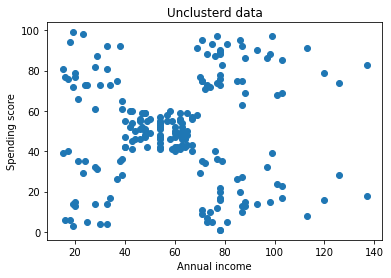

In [5]:
plt.title('Unclusterd data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [6]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [7]:
km=KMeans(n_clusters=10)
km.fit_predict(x)

array([6, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 6, 4, 6, 4,
       3, 4, 3, 4, 6, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 6, 4, 6, 1,
       6, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 9, 5, 2, 0, 9, 0, 9,
       5, 9, 0, 2, 0, 9, 0, 9, 0, 2, 5, 2, 0, 2, 5, 9, 0, 2, 0, 2, 0, 9,
       0, 2, 0, 9, 0, 9, 5, 2, 0, 2, 0, 9, 0, 2, 0, 9, 0, 9, 0, 2, 0, 2,
       0, 9, 0, 2, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8,
       7, 8])

In [8]:
km.inertia_

19664.68519600554

In [9]:
# C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\cluster\
#     _kmeans.py:881: UserWarning: KMeans is known to have a memory leak
#                 on Windows with MKL, when there are less chunks than 
#                 available threads. You can avoid it by setting the 
#                 environment variable OMP_NUM_THREADS=1.
#   warnings.warn(

#This error has solved by changing system environment variable OMP_NUM_THREADS to '1'
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [10]:
sse

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30259.657207285458,
 25011.839349156595,
 21826.936303231643,
 19657.783608703947,
 17872.838154158504,
 15838.717785514093,
 14320.918182339492,
 13470.78725601195,
 11919.692513283811]

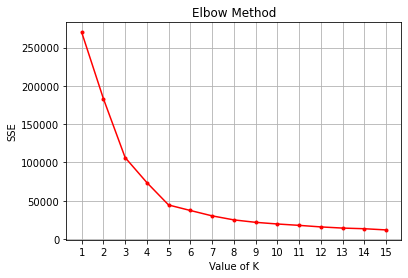

In [11]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')
#here elbow point i.e k=5

In [13]:
#Now clustring is Done by Silhouette method
from sklearn.metrics import silhouette_score

In [14]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

In [15]:
silh

[0.2918426367691145,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5264283703685728,
 0.45587587491169757,
 0.4563032021725485,
 0.4509237544334418,
 0.42525828385824815,
 0.45319821116491676,
 0.4180106302945449,
 0.4077756550038818,
 0.4312993603118615]

<BarContainer object of 14 artists>

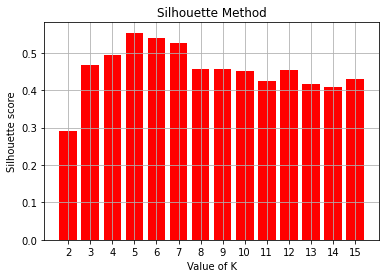

In [16]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhouette score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='red')
#Here silhouette score is maxm for k=5

In [17]:
#this is unsuperwised learning
km=KMeans(n_clusters=5)
labels=km.fit_predict(x)
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [19]:
km=KMeans(n_clusters=5,random_state=0)
labels=km.fit_predict(x)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [22]:
cent=km.cluster_centers_
cent

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

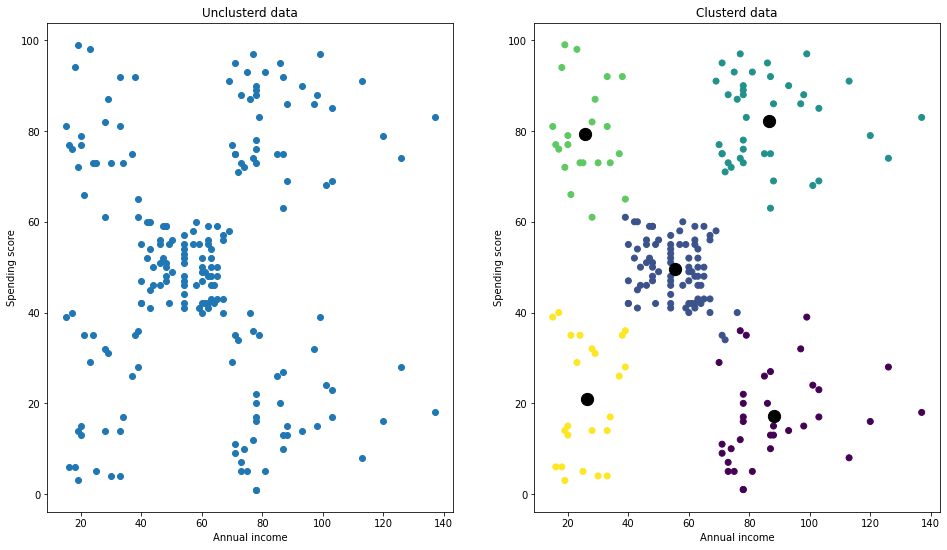

In [41]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclusterd data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clusterd data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k')

In [26]:
km.inertia_

44448.45544793369

In [27]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [29]:
four=df[labels==4]
four.to_csv('mydata.csv')

In [31]:
km.predict([[46,78]])[0]

3

In [34]:
#Now working with Agglomerative Clustering method
agl=AgglomerativeClustering(n_clusters=5)
alabels=agl.fit_predict(x)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

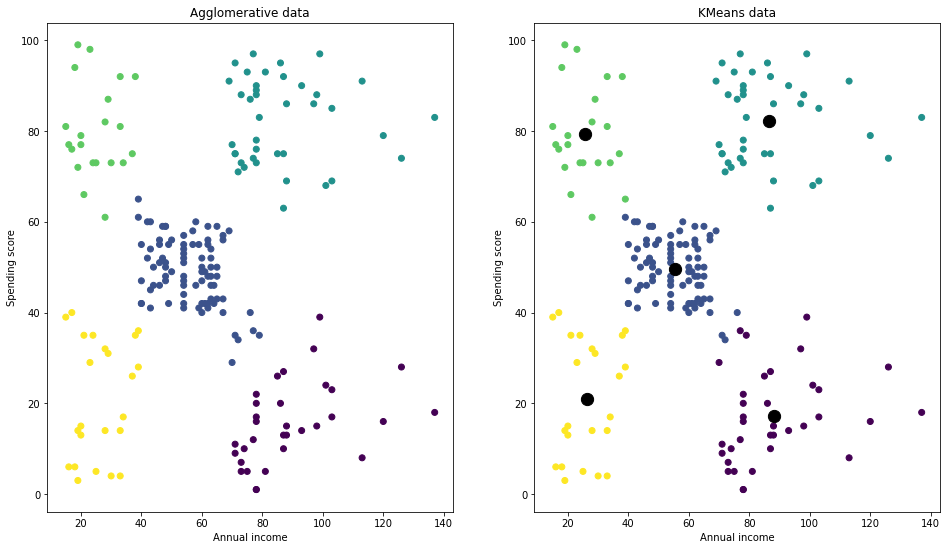

In [35]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)

plt.subplot(1,2,2)
plt.title('KMeans data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k')
#Here change is only near to boundary points as every 
# algorithm is different at their own place